# <center> Мегалайн. Определение перспективного тарифа. 

## Содержание
1. [Описание проекта](#1)
2. [Импорт библиотек и загрузка данных](#2)
3. [Предобработка данных](#3)
4. [Исследовательский анализ данных](#4)
5. [Проверка гипотез](#5)
6. [Выводы](#6)

<a id="1"></a> 
## 1. Описание проекта
В настоящее время компания Мегалайн предлагает клиентам два тарифных плана: «Смарт» и «Ультра».

Целью нашего исследования является выявление тарифа, приносящего наибольшую прибыль компании. 

В данной работе проведем предварительный анализ тарифов на выборке из данных 500 клиентов за 2018г.
Мы узнаем, кто является пользователями "Мегалайна", откуда они, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за год. Проанализируем поведение клиентов и сделаем вывод, какой тариф лучше.

<a id="2"></a> 
## 2. Импорт библиотек и загрузка данных

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st

import plotly.graph_objs as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format

In [ ]:
# загрузим данные
df_users = pd.read_csv('/content/drive/My Drive/Datasets/users.csv')
df_calls = pd.read_csv('/content/drive/My Drive/Datasets/calls.csv')
df_internet = pd.read_csv('/content/drive/My Drive/Datasets/internet.csv')
df_messages = pd.read_csv('/content/drive/My Drive/Datasets/messages.csv')
df_tariffs = pd.read_csv('/content/drive/My Drive/Datasets/tariffs.csv')

# создадим список загруженных датафрейимов
dfs = [df_users, df_calls, df_internet, df_messages, df_tariffs]

# выведем основную информацию по каждому и сразу проверим наличие дубликатов
for df in dfs:
    df_info = pd.concat(
        [df.dtypes, 
         df.isna().count(), 
         df.isna().sum(), 
         df.isna().sum() / df.isna().count()],
        axis=1, keys=['dtypes', 'count', 'na_count', 'na_ratio']).reset_index()
    display(df.head(), df_info, df.describe().T, df.duplicated().sum())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,index,dtypes,count,na_count,na_ratio
0,user_id,int64,500,0,0.00
1,age,int64,500,0,0.00
2,churn_date,object,500,462,0.92
3,city,object,500,0,0.00
4,first_name,object,500,0,0.00
5,last_name,object,500,0,0.00
6,reg_date,object,500,0,0.00
7,tariff,object,500,0,0.00


,count,mean,std,min,25%,50%,75%,max
user_id,500.00,1249.50,144.48,1000.00,1124.75,1249.50,1374.25,1499.00
age,500.00,46.59,16.67,18.00,32.00,46.00,62.00,75.00


0

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,index,dtypes,count,na_count,na_ratio
0,id,object,202607,0,0.00
1,call_date,object,202607,0,0.00
2,duration,float64,202607,0,0.00
3,user_id,int64,202607,0,0.00


,count,mean,std,min,25%,50%,75%,max
duration,202607.00,6.76,5.84,0.00,1.30,6.00,10.70,38.00
user_id,202607.00,1253.94,144.72,1000.00,1126.00,1260.00,1379.00,1499.00


0

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,index,dtypes,count,na_count,na_ratio
0,Unnamed: 0,int64,149396,0,0.00
1,id,object,149396,0,0.00
2,mb_used,float64,149396,0,0.00
3,session_date,object,149396,0,0.00
4,user_id,int64,149396,0,0.00


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,149396.00,74697.50,43127.05,0.00,37348.75,74697.50,112046.25,149395.00
mb_used,149396.00,370.19,278.30,0.00,138.19,348.01,559.55,1724.83
user_id,149396.00,1252.10,144.05,1000.00,1130.00,1251.00,1380.00,1499.00


0

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,index,dtypes,count,na_count,na_ratio
0,id,object,123036,0,0.00
1,message_date,object,123036,0,0.00
2,user_id,int64,123036,0,0.00


,count,mean,std,min,25%,50%,75%,max
user_id,123036.00,1256.99,143.52,1000.00,1134.00,1271.00,1381.00,1499.00


0

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,index,dtypes,count,na_count,na_ratio
0,messages_included,int64,2,0,0.00
1,mb_per_month_included,int64,2,0,0.00
2,minutes_included,int64,2,0,0.00
3,rub_monthly_fee,int64,2,0,0.00
4,rub_per_gb,int64,2,0,0.00
5,rub_per_message,int64,2,0,0.00
6,rub_per_minute,int64,2,0,0.00
7,tariff_name,object,2,0,0.00


,count,mean,std,min,25%,50%,75%,max
messages_included,2.00,525.00,671.75,50.00,287.50,525.00,762.50,1000.00
mb_per_month_included,2.00,23040.00,10861.16,15360.00,19200.00,23040.00,26880.00,30720.00
minutes_included,2.00,1750.00,1767.77,500.00,1125.00,1750.00,2375.00,3000.00
rub_monthly_fee,2.00,1250.00,989.95,550.00,900.00,1250.00,1600.00,1950.00
rub_per_gb,2.00,175.00,35.36,150.00,162.50,175.00,187.50,200.00
rub_per_message,2.00,2.00,1.41,1.00,1.50,2.00,2.50,3.00
rub_per_minute,2.00,2.00,1.41,1.00,1.50,2.00,2.50,3.00


0

Мы имеем 5 таблиц с довольно чистыми данными. Дубликаты отсутствуют.  
Пропуски имеются только в 'churn_date', что является легко объяснимым, их всего порядка 8%. Проигнорируем их.
Отметим также наличие звонков с нулевой длительностью и проанализируем такие данные отдельно.
Нулевые значения имеются и в данных об использованном объеме интернет-трафика, что вероятнее всего указывает просто на неиспользование соответствующей услуги.

<a id="3"></a> 
## 3. Предобработка данных

##### Изменение типов данных

Заменим тип данных на временной для признаков, содержащих дату (в их названиях везде содержится 'date').
Заодно добавим отдельные столбцы с данными о месяце.

Также округлим вверх значения израсходованных минут и мегабайт в соответствии с правилом оператора. Это единственные данные, имеющие тип 'float64'. Заменим этот тип на 'int'.

In [ ]:
for df in dfs:
    for name in df.columns:
        if 'date' in name:
            df[name] = pd.to_datetime(df[name])
            df['month'] = df[name].dt.month
        if df[name].dtype == 'float64':
            df[name] = df[name].apply(np.ceil).astype('int')

##### Поиск и обработка ошибок в данных

Рассмотрим, как соотносится количество нулевых и всех вместе взятых значений в данных о длительности звонков и объеме интернет-трафика, сгрупированных по различным признакам.  
В качестве признаков возьмем пользователей, месяцы и тарифы.

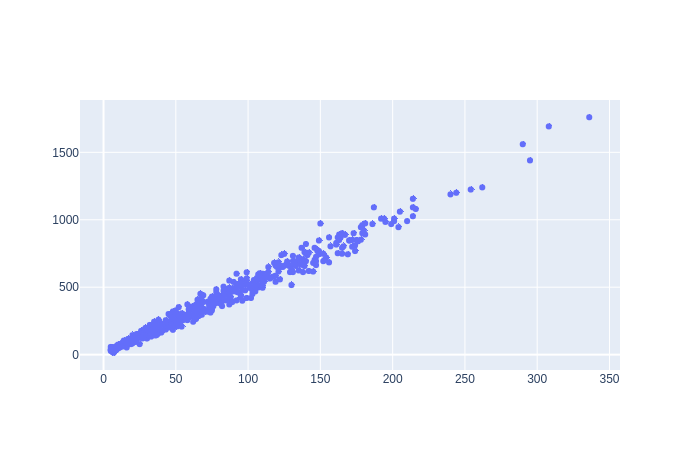

Null and total duration correlation by user_id: 0.9894102892562341


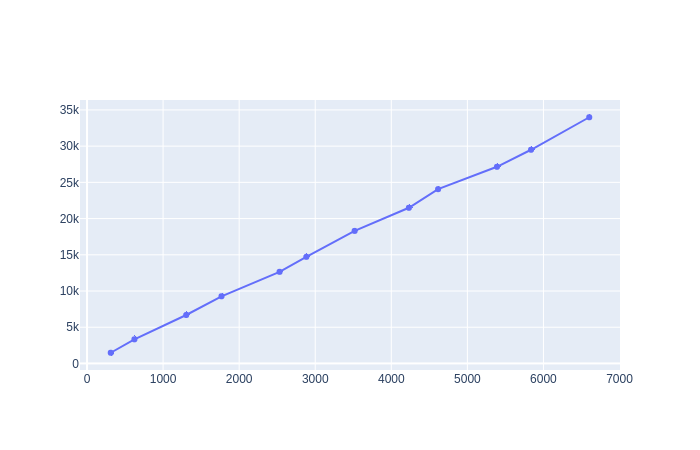

Null and total duration correlation by month: 0.9996609521035639


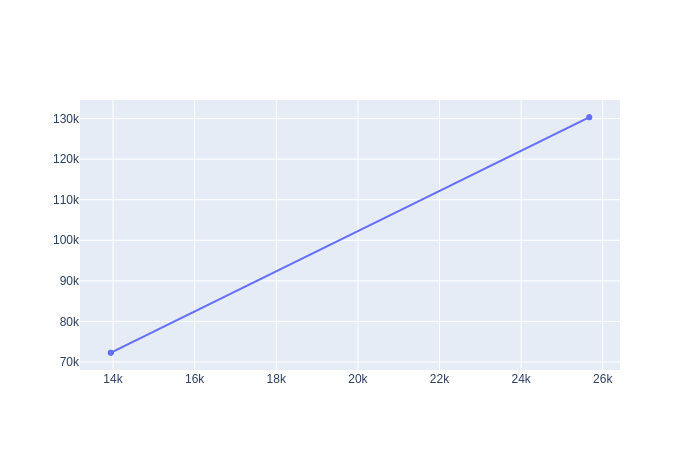

Null and total duration correlation by tariff: 1.0


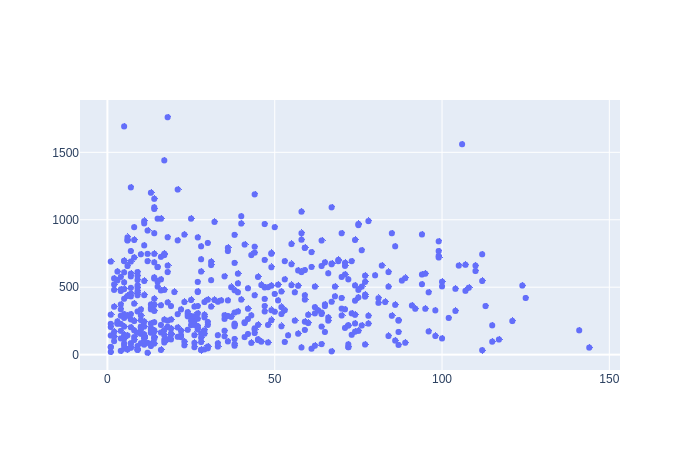

Null and total mb_used correlation by user_id: 0.3233094491064627


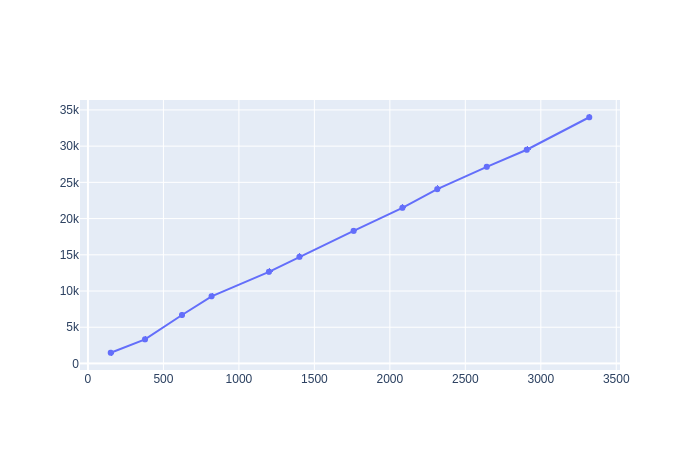

Null and total mb_used correlation by month: 0.9994169234198567


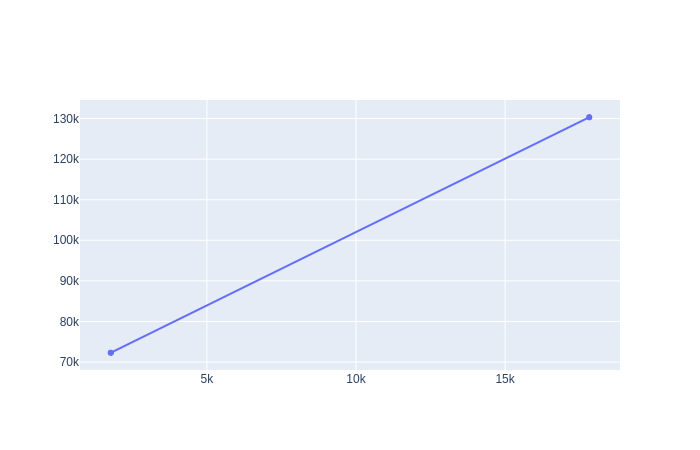

Null and total mb_used correlation by tariff: 0.9999999999999998


In [ ]:
# создадим словарь соответствия тарифов пользовательским id
tariffs_dict = dict(zip(df_users.user_id, df_users.tariff))

# построим графики и выведем значения корреляции для всех рассматриваемых комбинаций
for df in df_calls, df_internet:
    df['tariff'] = df.user_id.map(tariffs_dict)
    for feature in 'user_id', 'month', 'tariff':        
        nulls = df[(df.iloc[:, 2] == 0)].groupby(feature).id.count()
        totals = df_calls.groupby(feature).id.count()
        fig = go.Figure(
            data=go.Scatter(x=nulls, 
                            y=totals, 
                            mode=('markers' if feature == 'user_id' else None)
                            )
            )
        
        fig.show("png")
        print('Null and total {p} correlation by {f}:'\
              .format(p=df.columns[2], f=feature), nulls.corr(totals))
        

Мы видим, что доля звонков с нулевой продолжительностью очень стабильна вне зависимости от вариантов группировки и наблюдается устойчивая корреляция с общим количеством звонков. 


Легко убедиться, что выборка и по звонкам с небольшой ненулевой продолжительностью будет вести себя примерно так же, с ослаблением зависимости по мере увеличения длительности.  Это свидетельствует о наличии типичной повторяющеся ситуации, примерно равновероятной в любое время, при любом тарифе и для любого пользователя.   


В нашем случае звонками с нулевой длительностью могут быть звонки, "принятые" автоответчиком. Остановимся на таком предположении и сохраним нулевые значения, но будем помнить о них при дальнейшем анализе.

Что касается нулевого объема интернет-трафика, то здесь мы видим аналогичную картину, за исключением того, что этот объем распределен неравномерно между разными пользователями.

Это подтверждает наше предположение о том, что такие нудевые значения свидетелствуют о неиспользование соответствующей услуги теми или иными пользователями. В данном случае нулевые значения должны быть сохранены.


##### Рассчитаем для каждого пользователя дополнительные показатели:
- количество сделанных звонков и израсходованных минут разговора по месяцам;
- количество отправленных сообщений по месяцам;
- объем израсходованного интернет-трафика по месяцам;
- помесячную выручку с каждого пользователя.

In [ ]:
# количество сделанных звонков и израсходованных минут разговора по месяцам
calls_grouped = df_calls.groupby(['user_id', 'month']).duration.agg(['count', 'sum'])

In [ ]:
# количество отправленных сообщений по месяцам
messages_grouped = df_messages.groupby(['user_id', 'month']).id.count()

In [ ]:
# объем израсходованного интернет-трафика по месяцам
internet_grouped = df_internet.groupby(['user_id', 'month']).mb_used.sum()

In [ ]:
# объединим полученные таблицы и переименуем столбцы
dfs_grouped = calls_grouped.join([messages_grouped, internet_grouped], how='outer')
dfs_grouped.columns = ['calls', 'duration', 'messages', 'mb_used']

In [ ]:
# Проверим, появились ли пропуски в результате объединения таблиц
dfs_grouped.isna().sum()

calls        40
duration     40
messages    497
mb_used      11
dtype: int64

In [ ]:
# сбросим индексацию, заменим пропуски нулевыми значениями и переведем данные в целочисленный тип
dfs_grouped = dfs_grouped.reset_index().fillna(0).astype('int')

# добавим столбец с тарифами в 'dfs_grouped'
dfs_grouped['tariff'] = dfs_grouped.user_id.map(tariffs_dict)

# проверим полученные данные
dfs_grouped.head()

,user_id,month,calls,duration,messages,mb_used,tariff
0,1000,5,22,159,22,2256,ultra
1,1000,6,43,172,60,23257,ultra
2,1000,7,47,340,75,14016,ultra
3,1000,8,52,408,81,14070,ultra
4,1000,9,58,466,57,14581,ultra


Рассчитаем помесячную выручку с каждого пользователя.

In [ ]:
# для удобства расчетов введем в 'df_tariffs' индексацию по тарифам
df_tariffs = df_tariffs.set_index(keys=df_tariffs.tariff_name)

# добавим еще один толбец с переводом 'rub_per_gb' в мегабайты
df_tariffs['rub_per_mb'] = df_tariffs.rub_per_gb / 1024

In [ ]:
# напишем функцию для расчета выручки
def revenue_calc(row):
    tariff_name = row.tariff
    
    revenue_matrix = (np.array(row[['duration', 'messages', 'mb_used']]) - \
                      np.array(df_tariffs.loc[tariff_name, 
                                              ['minutes_included', 
                                               'messages_included', 
                                               'mb_per_month_included']
                                              ])) * \
                      np.array(df_tariffs.loc[tariff_name, 
                                              ['rub_per_minute', 
                                               'rub_per_message', 
                                               'rub_per_mb']])
    
    # полученные отрицательные значения заменим нулями - для случаев, когда бесплатные опции не были израсходованы
    revenue = sum(np.where(revenue_matrix < 0, 0, revenue_matrix)
                 ) + np.array(df_tariffs.loc[tariff_name, 'rub_monthly_fee'])
    
    return revenue

In [ ]:
# применим функцию и добавим столбец с данными о выручке в 'dfs_grouped'
dfs_grouped['revenue'] = dfs_grouped.apply(revenue_calc, axis=1)

# посмотрим на полученные данные
dfs_grouped.head(15)

,user_id,month,calls,duration,messages,mb_used,tariff,revenue
0,1000,5,22,159,22,2256,ultra,1950.00
1,1000,6,43,172,60,23257,ultra,1950.00
2,1000,7,47,340,75,14016,ultra,1950.00
3,1000,8,52,408,81,14070,ultra,1950.00
4,1000,9,58,466,57,14581,ultra,1950.00
5,1000,10,57,350,73,14717,ultra,1950.00
6,1000,11,43,338,58,14768,ultra,1950.00
7,1000,12,46,333,70,9827,ultra,1950.00
8,1001,11,59,430,0,18452,smart,1153.91
9,1001,12,63,414,0,14053,smart,550.00


<a id="4"></a> 
## 4. Исследовательский анализ данных

Проанализируем количество минут разговора, количество сообщений и объём интернет-трафика, требующиеся пользователям каждого тарифа в месяц.

duration                  messages  ...        mb_used                      
           mean       var    std     mean  ...   std     mean          var      std
tariff                                     ...                                     
smart    417.93  36219.32 190.31    33.38  ... 28.23 16229.19  34545911.13  5877.58
ultra    526.62 100873.63 317.61    49.36  ... 47.80 19486.90 101935621.05 10096.32

[2 rows x 9 columns]

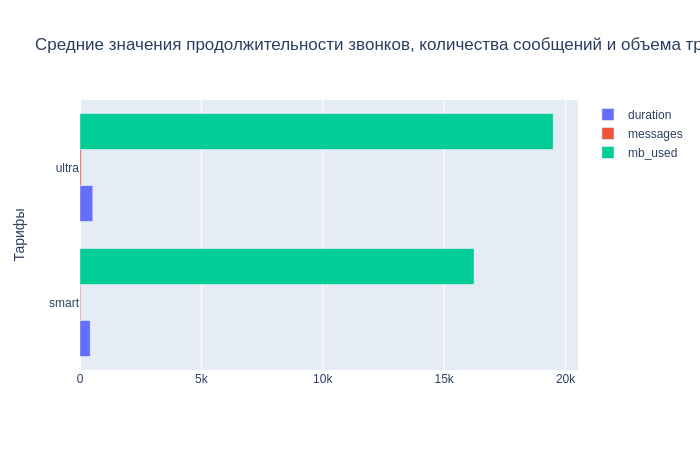

In [ ]:
# сгруппируем таблицу по тарифам, аггрегируем данные по среднемесячным значениям, дисперсии и стандартному отклонению
tariffs_grouped = (dfs_grouped.groupby('tariff')['duration', 'messages', 'mb_used']
                   .agg({'duration': [np.mean, np.var, np.std], 
                         'messages': [np.mean, np.var, np.std], 
                         'mb_used': [np.mean, np.var, np.std]}))
# выведем таблицу
display(tariffs_grouped)
# построим диаграмму средних значений
fig = go.Figure(data=[    
    go.Bar(name=feature, 
           y=tariffs_grouped.index.get_level_values(0), 
           x=tariffs_grouped[feature, 'mean'], 
           orientation='h') for feature in ['duration', 'messages', 'mb_used']
           ],
        layout=go.Layout(
        title="Средние значения продолжительности звонков, количества сообщений и объема трафика по тарифам",
        yaxis_title="Тарифы"))
fig.show("png")


In [ ]:
# сделаем группировку по пользователям
users_grouped = dfs_grouped.groupby('user_id')[
    'duration', 'messages', 'mb_used', 'revenue'].mean().reset_index()
# добавим столбец с тарифом
users_grouped['tariff'] = users_grouped.user_id.map(tariffs_dict)

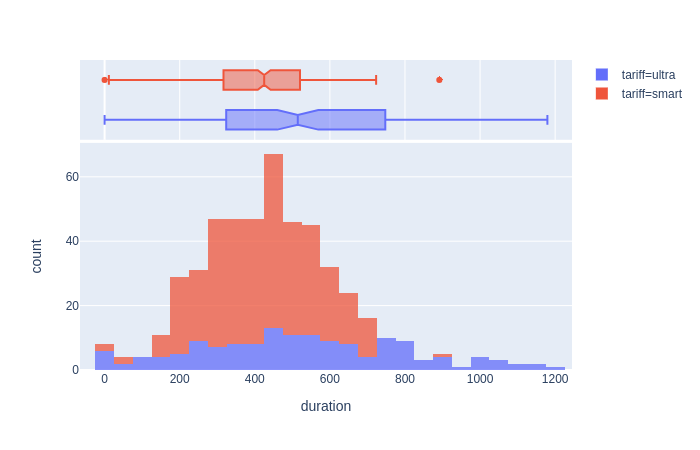

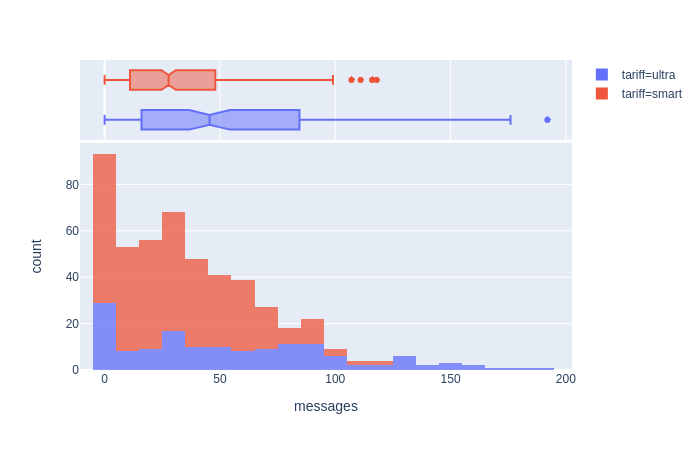

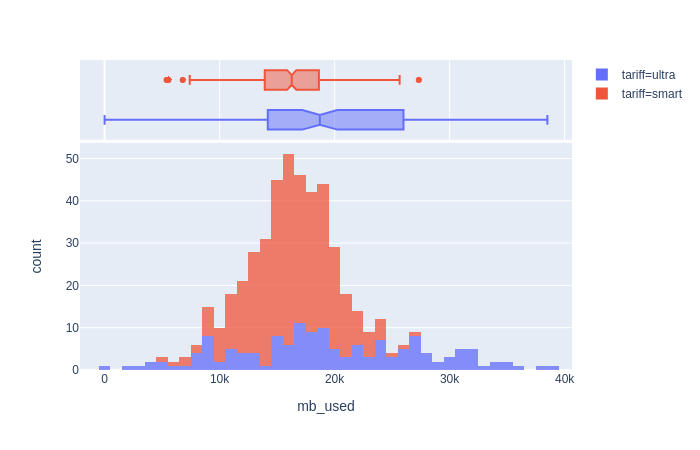

In [ ]:
# построим гистограммы
for feature in ['duration', 'messages', 'mb_used']:
    fig = px.histogram(users_grouped, x=feature, color='tariff', 
                       marginal="box", opacity=0.75
                       )
    fig.show("png")

Посмотрим еще раз на данные, сгруппированные по тарифам вместе с информацией по ним.

In [ ]:
display(df_tariffs, tariffs_grouped)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,rub_per_mb
tariff_name,,,,,,,,,
smart,50,15360,500,550,200,3,3,smart,0.20
ultra,1000,30720,3000,1950,150,1,1,ultra,0.15


duration                  messages  ...        mb_used                      
           mean       var    std     mean  ...   std     mean          var      std
tariff                                     ...                                     
smart    417.93  36219.32 190.31    33.38  ... 28.23 16229.19  34545911.13  5877.58
ultra    526.62 100873.63 317.61    49.36  ... 47.80 19486.90 101935621.05 10096.32

[2 rows x 9 columns]



Очевидно, что данные по рассмотренным признакам в рамках тарифа 'Smart' имеют ощутимо меньший разброс, чем по тарифу 'Ultra'.


Можно сделать вывод, что пользователи тарифа 'Ultra', имеющего и более высокую абонентскую плату, и включенные опции в большем объеме, ведут себя соответственно более разнообразно, в то время как пользователи тарифа 'Smart' тяготеют к использованию бесплатных опций в рамках своего пакета, хоть их расходы зачастую и выходят за его пределы.

Заметим также, что распределение сообщений похоже на пуассоновское, а распределение времени разговора и интернет-трафика ближе к нормальному.

<a id="5"></a> 
## 5. Проверка гипотез

В качестве рабочих гипотез в нашем исследовании приняты следующие положения:  
- средняя выручка по пользователям тарифов «Ультра» и «Смарт» различается;
- средняя выручка по пользователям из Москвы отличается от выручки пользователей из других регионов.

Сформулируем нулевые гипотезы как утверждающие отсутствие различий в исследуемых значениях и повторим для них соответсвующие рабочие гипотезы в качетсве альтернативных:    
[1-я группа](#h1)  
$H^1_0 $ — средняя выручка по пользователям тарифов «Ультра» и «Смарт» одинакова.  
$H^1_1 $ — средняя выручка по пользователям тарифов «Ультра» и «Смарт» различается.


[2-я группа](#h2)  
$H^2_0 $ — средняя выручка пользователей из Москвы равна выручке по пользователям из других регионов.  
$H^2_1 $ — средняя выручка пользователей из Москвы отличается от выручки по пользователям из других регионов.

<a id="h1"></a> 

___________
Проверим первую гипотезу

In [ ]:
# создадим две выборки с данными о выручке по каждому тарифу
ultra_revenue = dfs_grouped[dfs_grouped.tariff == 'ultra'].revenue
smart_revenue = dfs_grouped[dfs_grouped.tariff == 'smart'].revenue

In [ ]:
# сравним значения дисперсии по каждой выборке
print('Дисперсия по "ultra_revenue":', np.var(ultra_revenue))
print('Дисперсия по "smart_revenue":', np.var(smart_revenue))

Дисперсия по "ultra_revenue": 126824.39887571977
Дисперсия по "smart_revenue": 620174.2528422185


In [ ]:
# выполним проверку гипотезы
alpha = .05
results = st.ttest_ind(ultra_revenue, smart_revenue, equal_var=False) # дисперсии очень сильно отличаются -> equal_var=False

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.931402711366754e-296
Отвергаем нулевую гипотезу


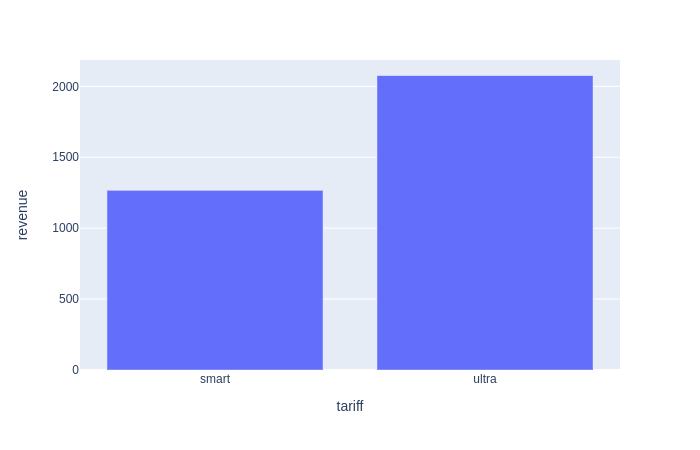

In [ ]:
# выведем данные о средней выручке по пользователям для каждого тарифа
fig = px.bar(users_grouped.groupby('tariff').revenue.mean().reset_index(), 
             x='tariff', y='revenue')
fig.show("png")

Результаты проверки выдвинутой гипотезы, как и очевидные значения средней выручки по имеющимся данным показывают, что средняя выручка по пользователям тарифов «Ультра» и «Смарт» различается практически наверняка.

<a id="h2"></a> 

___________
Проверим вторую гипотезу о различии выручки пользователей из Москвы от выручки пользователей из других регионов

In [ ]:
# создадим словарь соответствия пользователей городам
city_dict = dict(zip(df_users.user_id, df_users.city))

# создадим столбец с указанием города в сгруппированной по повльзователям таблице
users_grouped['city'] = users_grouped.user_id.map(city_dict) 

# создадим две выборки с данными о выручке - по Москве и по регионам
moscow_revenue = users_grouped[users_grouped.city == 'Москва'].revenue
regions_revenue = users_grouped[users_grouped.city != 'Москва'].revenue

In [ ]:
# сравним значения дисперсии по каждой выборке
print('Дисперсия по "moscow_revenue":', np.var(moscow_revenue))
print('Дисперсия по "regions_revenue":', np.var(regions_revenue))

Дисперсия по "moscow_revenue": 361910.60563816165
Дисперсия по "regions_revenue": 411442.9063817896


In [ ]:
# выполним проверку гипотезы
alpha = .05
results = st.ttest_ind(moscow_revenue, regions_revenue, equal_var=False)  # дисперсии отличаются -> equal_var=False

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.38492515973411034
Не получилось отвергнуть нулевую гипотезу


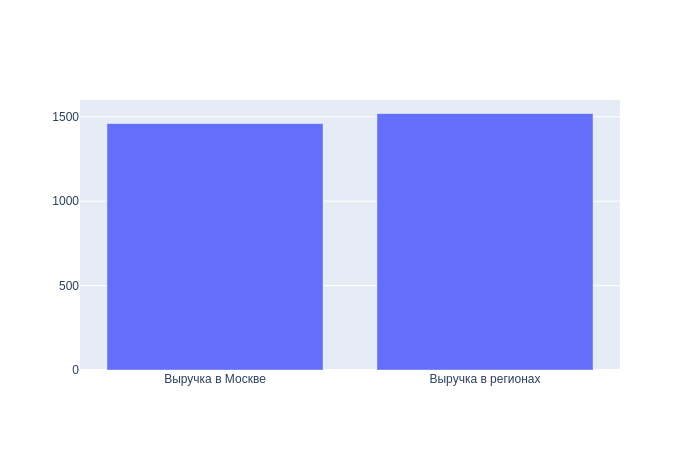

In [ ]:
# выведем данные о средней выручке по Москве и регионам
fig = go.Figure(go.Bar(x=['Выручка в Москве', 'Выручка в регионах'], 
                 y=[moscow_revenue.mean(), regions_revenue.mean()]))
fig.show("png")

Исходя из результатов анализа мы не можем отвергать возможность равенства выручки от пользователей из Москвы и пользователей из других регионов.

<a id="6"></a> 
## 6. Выводы

В результате проведенного анализа мы увидели, что в наиболее общем виде поведение разных пользователей (из разных регионов, с разными тарифами и т.д.) имеет сходство в отношении порядка сделанных звонков, отправленных сообщений и израсходованного интернет-трафика.

В то же время нами показаны поведенческие различия пользователей разных тарифов.  Пользователи тарифа "Ультра" обнаруживают больше разнообразия в своем поведении, они мало ориентируются на объем включенного пакета услуг, не всегда используют его в полном объеме (но чуть больше в среднем) и ведут себя свободно в рамках своих потребностей. 

Пользователи тарифа "Смарт", напротив, тяготеют к более оптимальному использованию включенного пакета, при этом перерасходую его  в среднем более чем в два раза.

Мы проверили гипотезы о наличии разницы в выручке по пользователям различных тарифов и по Москве и регионам.


По результатам статистического анализа можно с большой уверенностью говорить о наличии разницы в выручке по тарифам, причем для тарифа "Ультра" ее значение весомо больше.

Что касается отличия значений выручки по региональному прнципу, то в данном случае мы не можем говорить о наличии такого отличия.

Отметим, что для порогового значения $\alpha$ мы выбрали величину 5%. При этом легко показать, что наши выводы не изменятся при ее понижении.